In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://coinmarketcap.com/"
request = requests.get(url)

ConnectionError: HTTPSConnectionPool(host='coinmarketcap.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000015354405310>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [3]:
request

<Response [200]>

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><meta content="https://coinmarketcap.com/" property="og:url"/><link href="https://coinmarketcap.com/" rel="canonical"/><link href="https://coinmarketcap.com/ar/" hreflang="ar" rel="alternate"/><link href="https://coinmarketcap.com/bg/" hreflang="bg" rel="alternate"/><link href="https://coinmarketcap.com/cs/" hreflang="cs" rel="alternate"/><link href="https://coinmarketcap.com/da/" hreflang="da" rel="alternate"/><link href="https://coinmarketcap.com/de/" hreflang="de" rel="alternate"/><link href="https://coinmarketcap.com/el/" hreflang="el" rel="alternate"/><link href="https://coinmarketcap.com/" hreflang="en" rel="alternate"/><link href="https://coinmarketcap.com/es/" hreflang="es" rel="alternate"/><link href="https://coinmarketcap.com/fi/" hr
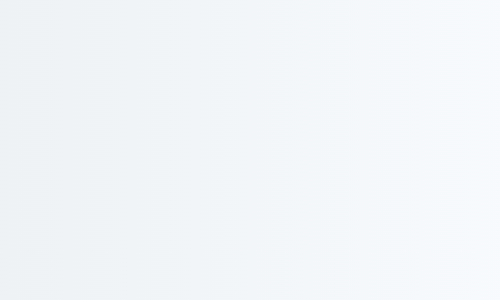

In [6]:
soup = BeautifulSoup(request.content, 'html.parser')
soup

In [7]:
table = soup.find('table', class_="cmc-table")
table

<table class="sc-db1da501-3 ccGPRR cmc-table"><colgroup><col/><col style="width:50px;min-width:auto;max-width:auto"/><col style="width:250px;min-width:auto;max-width:auto"/><col/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col/></colgroup><thead><tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-65e7f566-0 BmVAr"><span class="sc-65e7f566-0 iSzLgt rank-column-title">#</span></div></th><th class="stickyTop" style="text-align:start"><div class="sc-e297ecb-0 bSCmGv sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><p class="sc-71024e3e-0 fSsxNG" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></

In [9]:
rows = table.find_all("tr")
rows

[<tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-65e7f566-0 BmVAr"><span class="sc-65e7f566-0 iSzLgt rank-column-title">#</span></div></th><th class="stickyTop" style="text-align:start"><div class="sc-e297ecb-0 bSCmGv sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><p class="sc-71024e3e-0 fSsxNG" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></span></div></div></th><th class="stickyTop" style="text-align:end"><div class="sc-e297ecb-0 kPErdo sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></span><p class="sc-71024e3e-0 fSsxNG" color="text" data-sensors-click="true" font-size="0">Price</p></div></div></th><th class="stickyTop" style="text-align:end"><div class="sc-e297ecb-0 kPErdo sortable-header-container"><div class="sc-e297ecb-1 fSUTFC"><span class="sc-e297ecb-2 dJFDMv icon-wrapper"></span><p class="sc-71024e3

In [56]:
data = []

# Loop through rows and collect data
for row in rows[1:11]:
    table_data = row.find_all('td')
    rank = table_data[1].text.strip()
    name = table_data[2].text.strip()
    price = table_data[3].text.strip()
    hour_change = table_data[4].text.strip()
    day_change = table_data[5].text.strip()
    seven_days = table_data[6].text.strip()
    market_cap = table_data[7].text.strip()
    volume = table_data[8].text.strip()
    
    # Append the row as a dictionary
    data.append({
        'Rank': rank,
        'Name': name,
        'Price': price,
        '1h Change': hour_change,
        '24h Change': day_change,
        '7d Change': seven_days,
        'Market Cap': market_cap,
        'Volume': volume
    })

# Now create DataFrame once, after collecting all data
df = pd.DataFrame(data)
df.to_csv('crypto.csv', index=False)

## Selenium 

In [32]:
from selenium.webdriver.common.by import By

In [26]:
#Services

In [41]:
options = Options()
#options.add_argument("--headless")

driver = webdriver.Chrome()
driver.get("https://realpython.github.io/fake-jobs/")

In [44]:
title = driver.find_element(By.CLASS_NAME, 'title.is-5').text
title

'Senior Python Developer'

In [55]:
divs = driver.find_elements(By.CLASS_NAME, 'column.is-half')

ds = []
for div in divs:
    title = div.find_element(By.CLASS_NAME, 'title.is-5').text
    sub_title = div.find_element(By.CLASS_NAME, 'subtitle.is-6.company').text
    
    ds.append({
        'title':title,
        'sub_title': sub_title})
aal = pd.DataFrame(ds)
aal.to_csv('fake_jobs.csv', index=False)

In [57]:
options = Options()
#options.add_argument("--headless")

driver = webdriver.Chrome()
driver.get("https://coinmarketcap.com/")

In [58]:
title = driver.find_element(By.CLASS_NAME, 'cmc-table').text
title

'#\nName\nPrice\n1h %\n24h %\n7d %\nMarket Cap\nVolume(24h)\nCirculating Supply\nLast 7 Days\n1\nBitcoin\nBTC\nBuy\n$95,500.48\n0.12% 0.89% 1.64%\n$1,896,642,498,436\n$15,990,191,376\n167.43K BTC\n19.86M BTC\n2\nEthereum\nETH\nBuy\n$1,829.85\n0.04% 0.35% 1.94%\n$220,828,290,417\n$9,018,670,526\n4.93M ETH\n120.73M ETH\n3\nTether\nUSDT\nBuy\n$1.00\n0.01% 0.04% 0.03%\n$149,359,776,819\n$38,154,501,363\n38.15B USDT\n149.35B USDT\n4\nXRP\nXRP\nBuy\n$2.19\n0.24% 0.81% 1.17%\n$128,340,244,098\n$1,529,703,372\n697.31M XRP\n58.5B XRP\n5\nBNB\nBNB\nBuy\n$588.72\n0.26% 1.74% 1.76%\n$82,945,806,967\n$1,280,679,822\n2.17M BNB\n140.88M BNB\n6\nSolana\nSOL\nBuy\n$146.83\n0.28% 1.31% 1.49%\n$76,072,746,155\n$1,567,376,878\n10.67M SOL\n518.06M SOL\n7\nUSDC\nUSDC\nBuy\n$1.00\n0.01% 0.00% 0.00%\n$61,515,502,538\n$5,412,184,695\n5.41B USDC\n61.51B USDC\n8\nDogecoin\nDOGE\nBuy\n$0.1732\n0.43% 3.18% 4.00%\n$25,831,051,257\n$576,571,852\n3.32B DOGE\n149.12B DOGE\n9\nCardano\nADA\nBuy\n$0.6893\n0.06% 4.17% 0.

In [63]:
rows = driver.find_elements(By.TAG_NAME,'tr')
rows

[<selenium.webdriver.remote.webelement.WebElement (session="9fda3f4b35f38e87ecbcd3da9c38821a", element="f.DB338AEA95D3FAD58CFF0567903FF60E.d.F01CDAE7E3AC24DD7D72BD816963EA64.e.69")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9fda3f4b35f38e87ecbcd3da9c38821a", element="f.DB338AEA95D3FAD58CFF0567903FF60E.d.F01CDAE7E3AC24DD7D72BD816963EA64.e.70")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9fda3f4b35f38e87ecbcd3da9c38821a", element="f.DB338AEA95D3FAD58CFF0567903FF60E.d.F01CDAE7E3AC24DD7D72BD816963EA64.e.71")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9fda3f4b35f38e87ecbcd3da9c38821a", element="f.DB338AEA95D3FAD58CFF0567903FF60E.d.F01CDAE7E3AC24DD7D72BD816963EA64.e.72")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9fda3f4b35f38e87ecbcd3da9c38821a", element="f.DB338AEA95D3FAD58CFF0567903FF60E.d.F01CDAE7E3AC24DD7D72BD816963EA64.e.73")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9fda3f4b35f38e87ecbcd3da9

In [61]:
for row in rows[1:11]:
    table_data = row.find_elements(By.TAG_NAME, 'td')
    rank = table_data[1].text.strip()
    name = table_data[2].text.strip()
    price = table_data[3].text.strip()
    hour_change = table_data[4].text.strip()
    day_change = table_data[5].text.strip()
    seven_days = table_data[6].text.strip()
    market_cap = table_data[7].text.strip()
    volume = table_data[8].text.strip()
    print(rank, name, price, hour_change, day_change, seven_days, market_cap, volume)

1 Bitcoin
BTC
Buy $95,484.07 0.16% 0.99% 1.62% $1,896,316,773,526 $16,044,953,148
168.00K BTC
2 Ethereum
ETH
Buy $1,829.85 0.04% 0.35% 1.94% $220,828,290,417 $9,018,670,526
4.93M ETH
3 Tether
USDT
Buy $1.00 0.01% 0.04% 0.03% $149,359,776,819 $38,154,501,363
38.15B USDT
4 XRP
XRP
Buy $2.19 0.24% 0.81% 1.17% $128,340,244,098 $1,529,703,372
697.31M XRP
5 BNB
BNB
Buy $588.72 0.26% 1.74% 1.76% $82,945,806,967 $1,280,679,822
2.17M BNB
6 Solana
SOL
Buy $146.83 0.28% 1.31% 1.49% $76,072,746,155 $1,567,376,878
10.67M SOL
7 USDC
USDC
Buy $1.00 0.01% 0.00% 0.00% $61,515,502,538 $5,412,184,695
5.41B USDC
8 Dogecoin
DOGE
Buy $0.1732 0.43% 3.18% 4.00% $25,831,051,257 $576,571,852
3.32B DOGE
9 Cardano
ADA
Buy $0.6893 0.06% 4.17% 0.97% $24,335,221,081 $787,439,581
1.14B ADA
10 TRON
TRX
Buy $0.2476 0.19% 0.45% 0.42% $23,507,716,285 $401,301,595
1.62B TRX
